# Breast Cancer Prediction: A Data-Driven Adventure!

Welcome to our data adventure where we help predict whether a breast cancer tumor is malignant (dangerous) or benign (less worrisome)! Imagine we’re detectives using clues (data) to solve a mystery—here, the mystery is cancer diagnosis.

**Our Mission:**
- Understand our “clues” (data) by exploring it in detail.
- Clean up the clues (preprocess data) so our detective work is as accurate as possible.
- Experiment with different “tools” (machine learning models) to see which one cracks the case best.
- Choose the best tool based on how well it identifies the culprit (accurate prediction) using scores like Accuracy, Precision, Recall, and F1 Score.


In [1]:
import numpy as np  # Linear algebra operations
import pandas as pd  # Data processing, CSV file I/O
import warnings  # Suppress warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting library

from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic regression model
from sklearn.metrics import accuracy_score  # Accuracy evaluation

from sklearn.pipeline import Pipeline  # Create ML pipelines
from sklearn.model_selection import GridSearchCV, train_test_split  # Hyperparameter tuning & data splitting
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay)  # Model evaluation metrics

from xgboost import XGBClassifier  # XGBoost classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble learning models


## Data Loading and First Impressions

First things first, we load our dataset—a treasure chest of clues—directly from Kaggle. Then we take a quick peek inside to see what we have:
- How many clues (rows) and details (columns) do we have?
- Are any clues missing? (We definitely don’t want to miss any important hints!)
- We also remove unnecessary clutter (like an ID number) that doesn't help solve our case.


In [2]:
# Let's open our treasure chest (dataset) and check out its contents.
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()  # Take a sneak peek at the first few clues

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## A Few Quick Observations About Our Data

Before we dive into solving the mystery of breast cancer, here are a few clues about our dataset that we need to tidy up:

1. **The Mysterious "id":**  
   Think of the "id" column as a random serial number on a detective's badge—it doesn't tell us anything about the case. So, we drop it because it's just extra noise in our investigation!

2. **Diagnosis is Our Golden Clue:**  
   The "diagnosis" column is our target variable, the ultimate hint that tells us whether a tumor is malignant (dangerous) or benign (less worrisome). This is the answer we're trying to predict.

3. **The Case of "Unnamed: 32":**  
   The "Unnamed: 32" column is like a mysterious file with too many missing pages (NaNs). Since it doesn't provide any useful information, we can safely ignore it.

4. **Feature Names – Who Needs Them?**  
   As for the other feature names? Honestly, while it’s fun to know what each clue is called, the magic of machine learning lets the algorithms figure out what’s important without us having to read every label. In our case, it's all about the data patterns, not the fancy names!

With these observations in hand, we're all set to clean up our data and let our models do the detective work!


## Data Preprocessing: Getting Our Clues in Order

Before we start our detective work, we need to tidy up our clues. We:
1. **Remove Unnecessary Items:** Drop columns like the 'id' because they're just labels.
2. **Standardize the Clues:** Think of this like making sure all measurements (inches, centimeters, etc.) are converted to one system. We scale the features so each one is comparable, ensuring no one clue overpowers the others.


In [5]:
df_cleaned = df.drop(['id','Unnamed: 32' ] , axis=1)
df_cleaned.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [6]:
df_cleaned.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# We separate the important clues (features) from the final answer (diagnosis)
features = df_cleaned.drop(['diagnosis'], axis=1)  

# Standardize the features (convert all measurements to the same system)
scaler = StandardScaler()

# Fit the scaler and transform the data
scaled_values = scaler.fit_transform(features)

# Convert the scaled data back to a DataFrame for easier handling
df_scaled = pd.DataFrame(scaled_values, columns=features.columns)

In [8]:
x = df_scaled
y = df_cleaned.diagnosis

df_scaled.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

Number of Benign:  357
Number of Malignant :  212


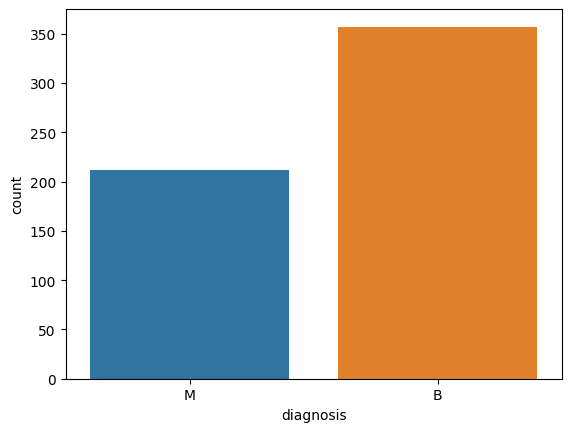

In [9]:
ax = sns.countplot(x=y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

## Do We Really Need to Understand Every Feature?

When it comes to our data clues, you don't need to know every little detail about each feature's meaning—machine learning is awesome that way! But, to get a feel for what’s happening, it helps to know some basic statistics like:

- **Variance & Standard Deviation:** How spread out the values are.
- **Count (Number of Samples):** How many observations we have.
- **Min & Max Values:** For instance, our `area_mean` might max out around 2500, while `smoothness_mean` barely reaches 0.16340.

Knowing these numbers is like having a quick snapshot of our data's personality—it gives us a sense of scale and variability without needing to understand the detailed meaning behind each feature.

### So, Do We Need Standardization or Normalization?

Well, the answer is both **yes and no**—not too surprising, right?  
- **Yes:** Standardization or normalization is essential before visualization, feature selection, feature extraction, or classification. Why? Because when features are on different scales (like 2500 vs. 0.16340), it can mess up the learning process. It’s like comparing skyscrapers with garden sheds!
- **No:** You don’t need to understand the deep meaning behind every feature—just ensuring they’re on the same scale is enough for the algorithms to work their magic.

Now, let's go step by step and start with visualization!


## Exploring Our Clues: EDA Fun!

Now, let's have some fun exploring our dataset:
- **Histograms & Density Plots:** Like looking at the distribution of candy in a jar, we check how each feature is spread out.
- **Box Plots & Swarm Plots:** These help us spot any outliers (like an unusually big candy) and understand the range of our clues.
- **Heatmaps:** This is our “secret map” that shows which clues are closely related (almost like best friends!) and might be giving us redundant information.


In [10]:
all_columns = list(x.columns)

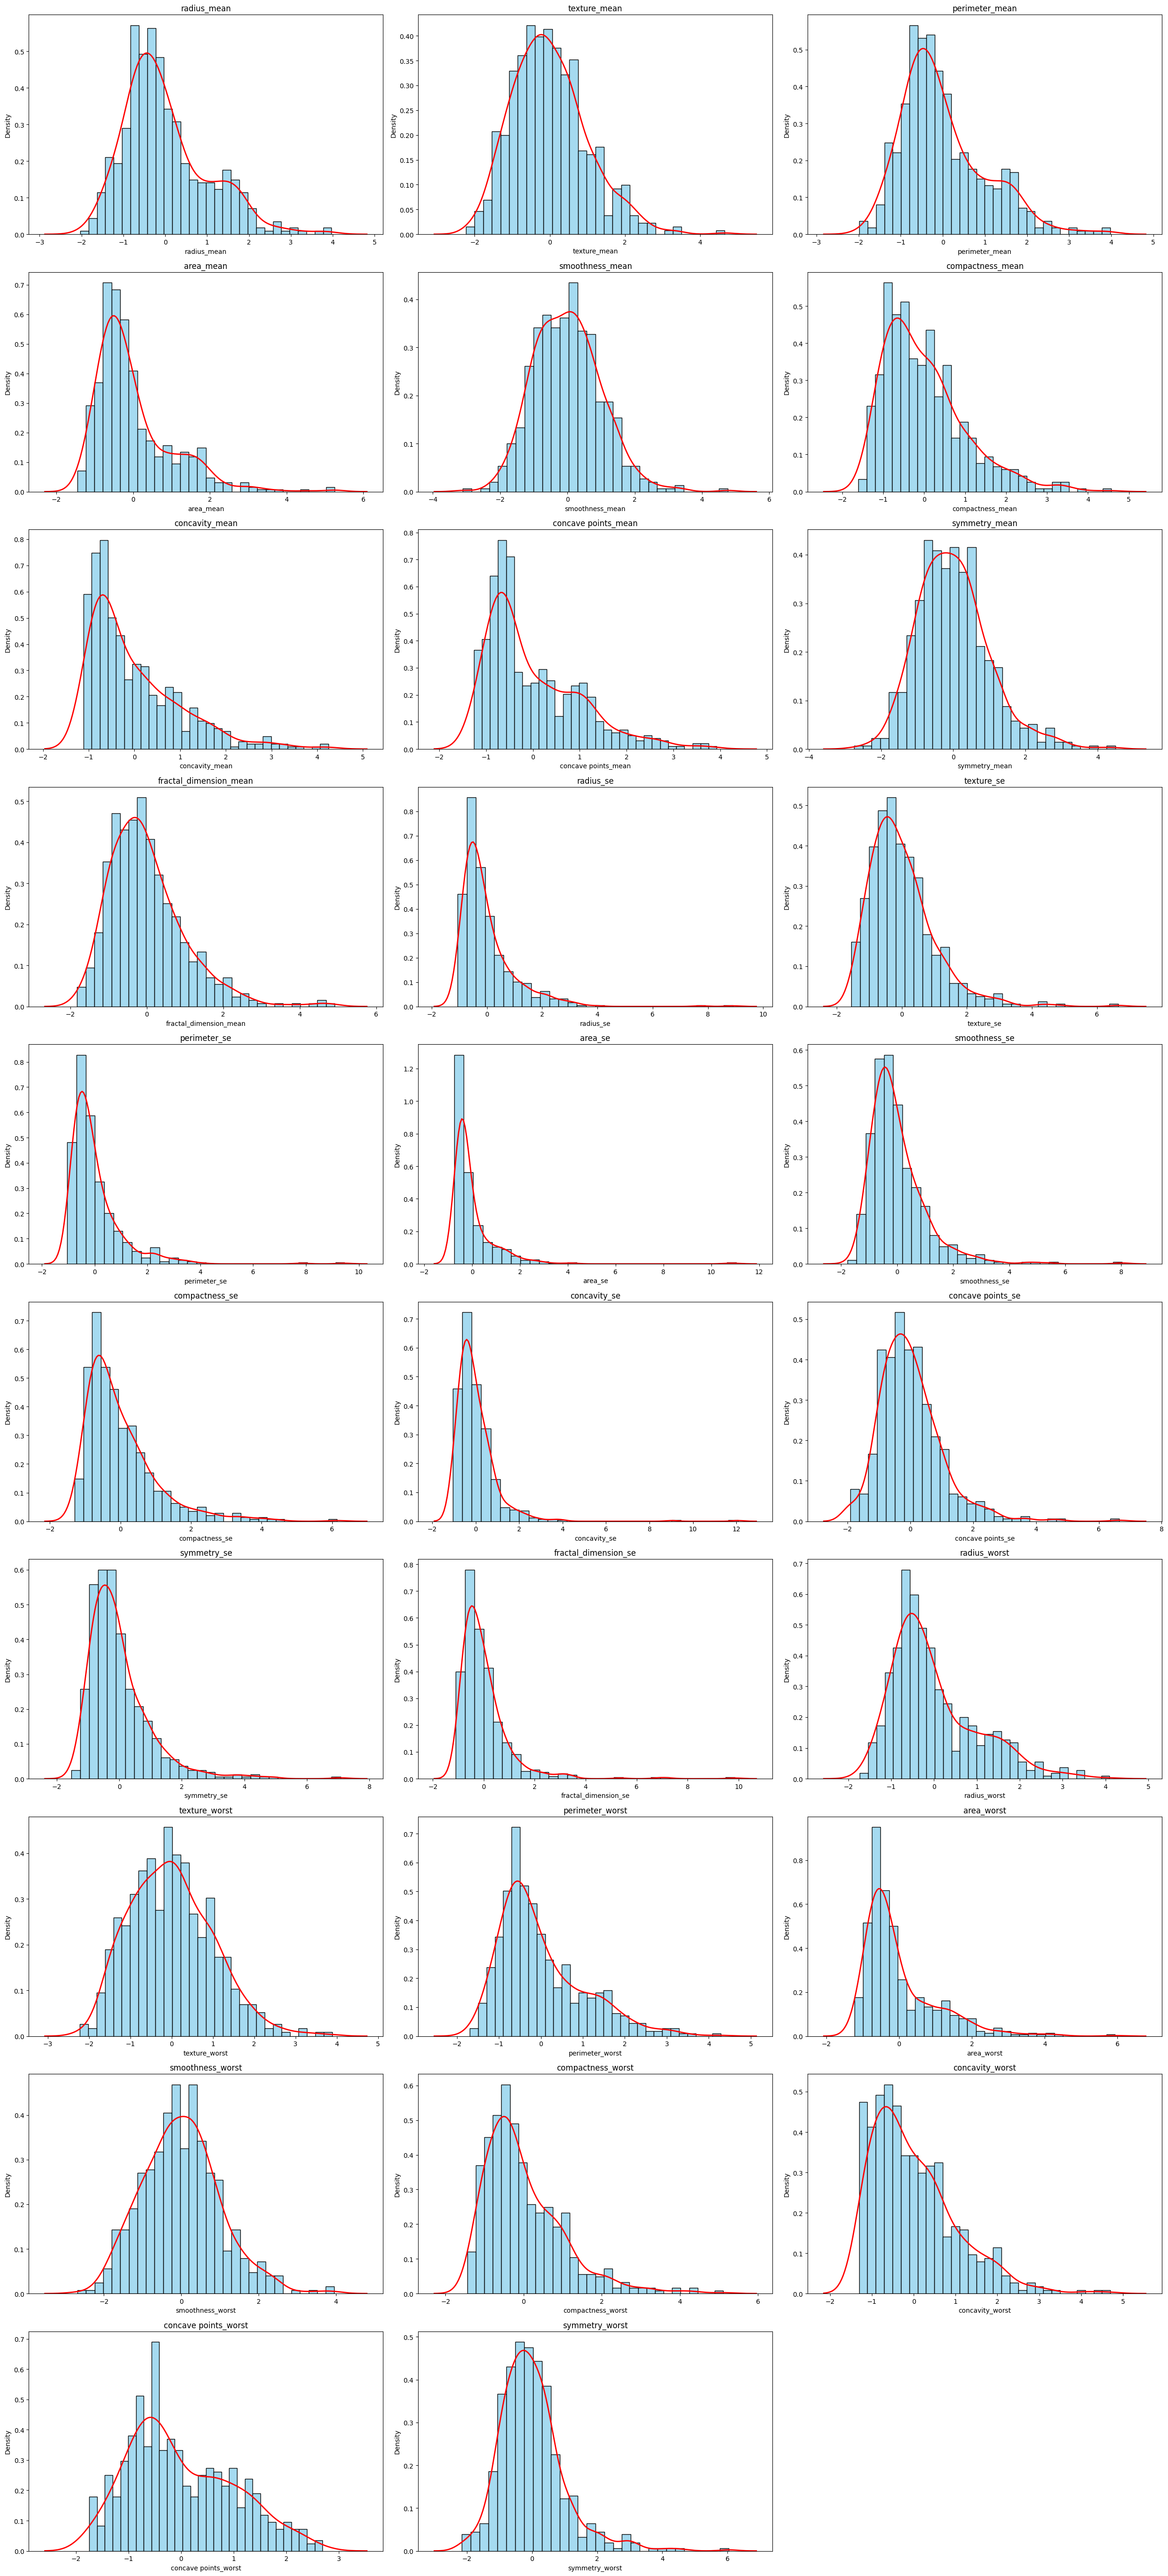

In [11]:


# Optional: Suppress FutureWarnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(25,55))
cols = all_columns[0:]
for i in range(29):
    plt.subplot(10, 3, i + 1)
    # Plot histogram on density scale
    sns.histplot(x[cols[i]], stat='density', bins=30, color='skyblue')
    # Overlay the density line
    sns.kdeplot(x[cols[i]], color='red', lw=2)
    plt.title(cols[i])
plt.tight_layout()
plt.show()


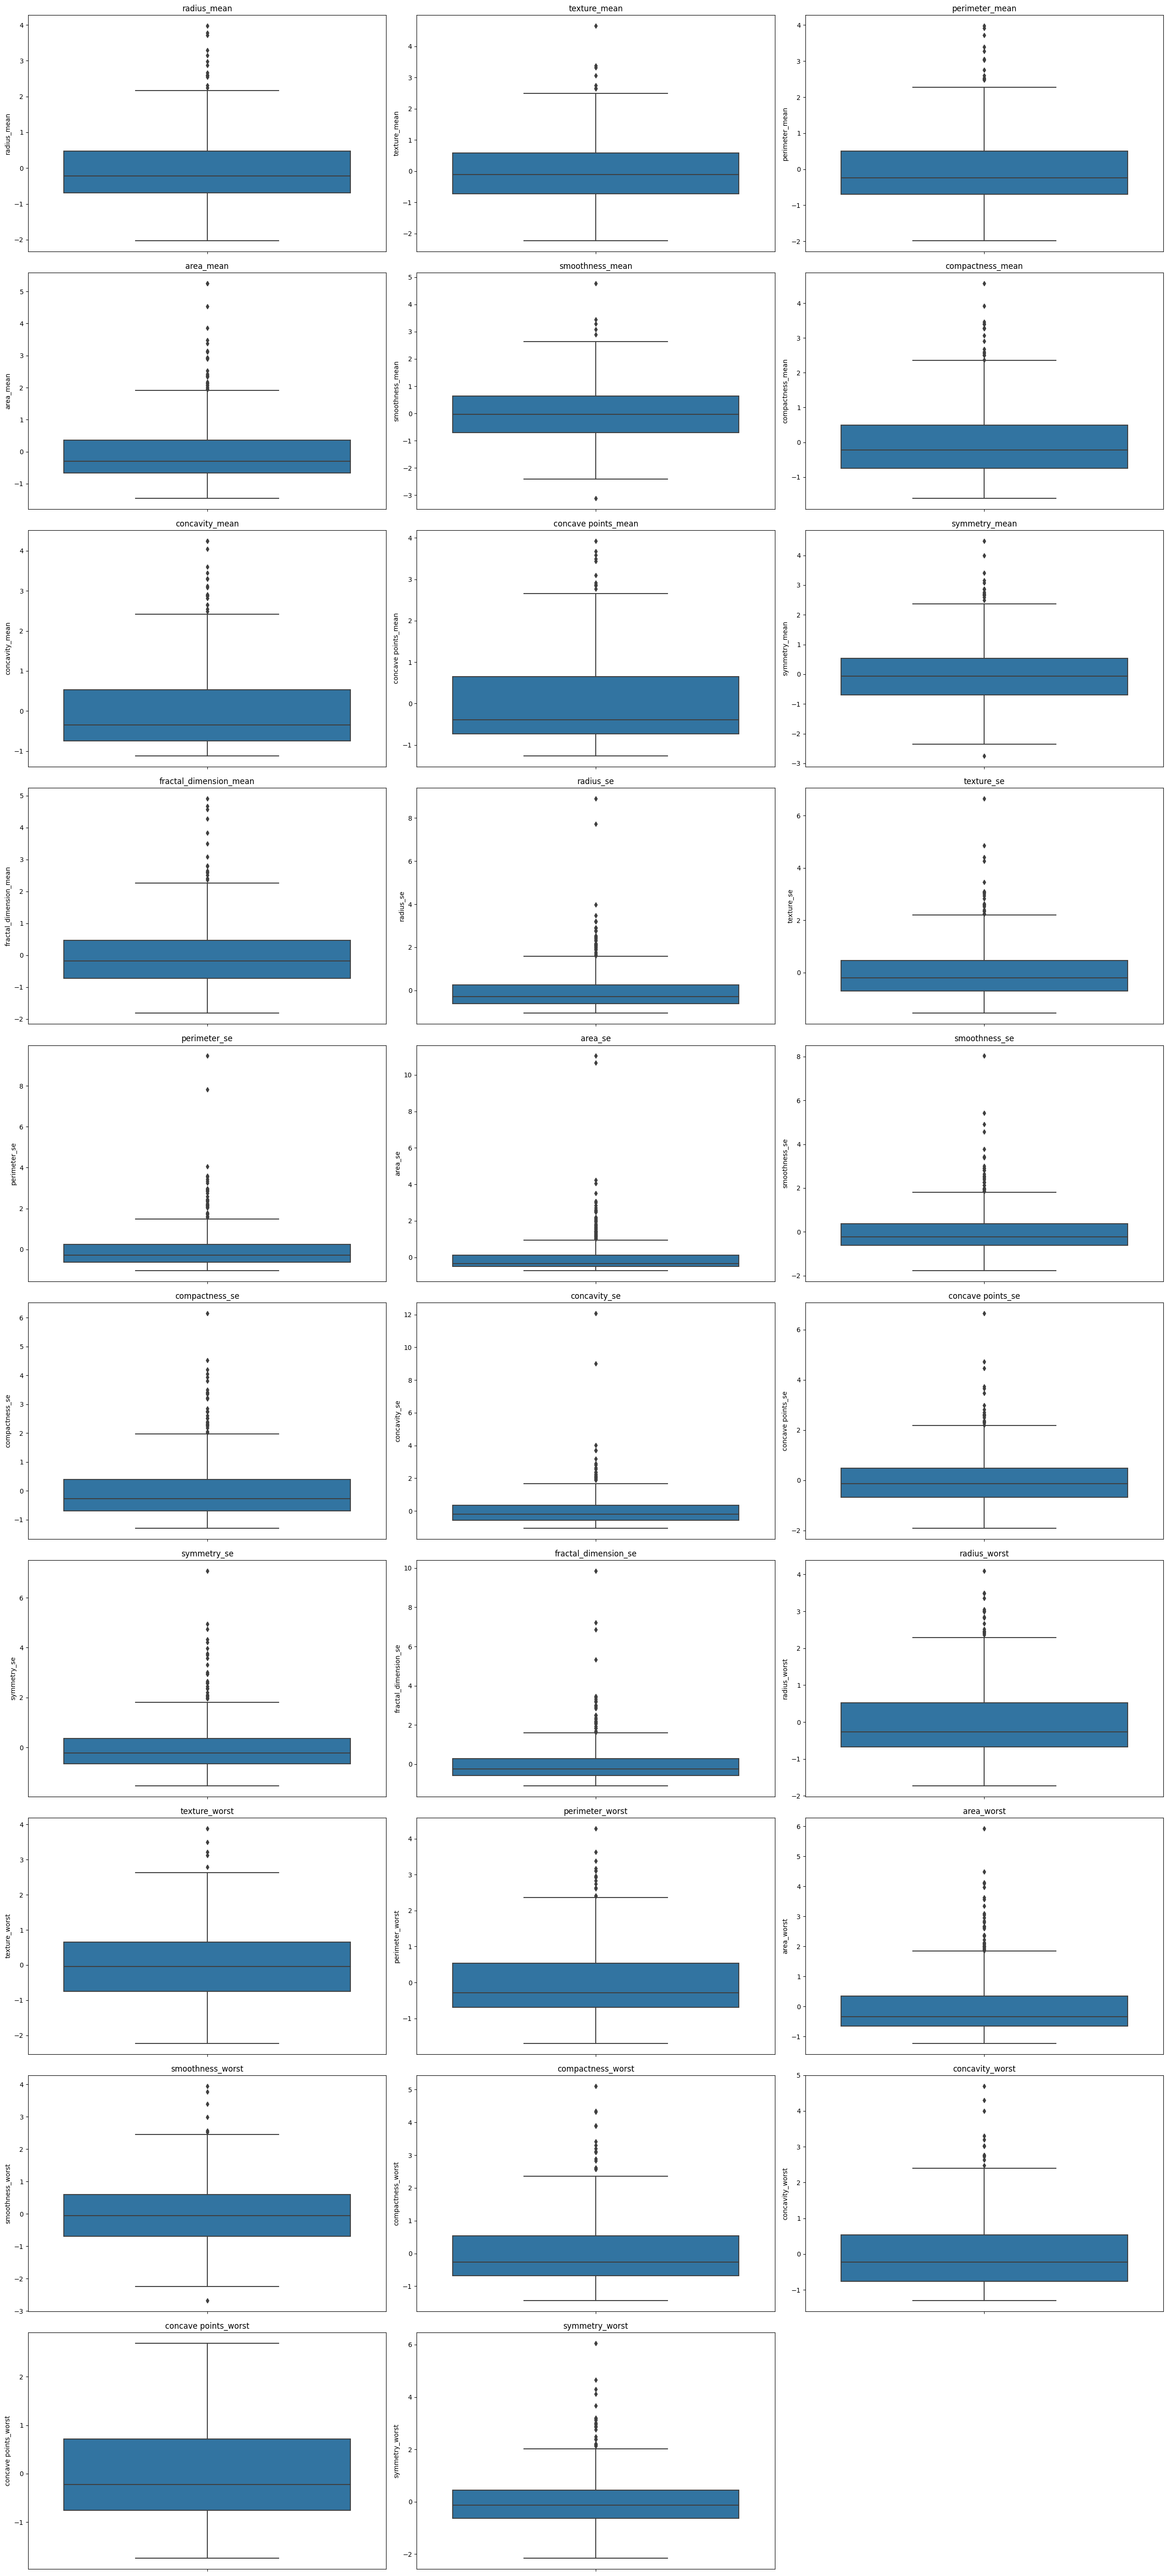

In [12]:
plt.figure(figsize=(25,55))
for i in range(29):
    plt.subplot(10, 3, i+1)
    sns.boxplot(y=x[cols[i]])
    plt.title(cols[i])
plt.tight_layout()
plt.show()


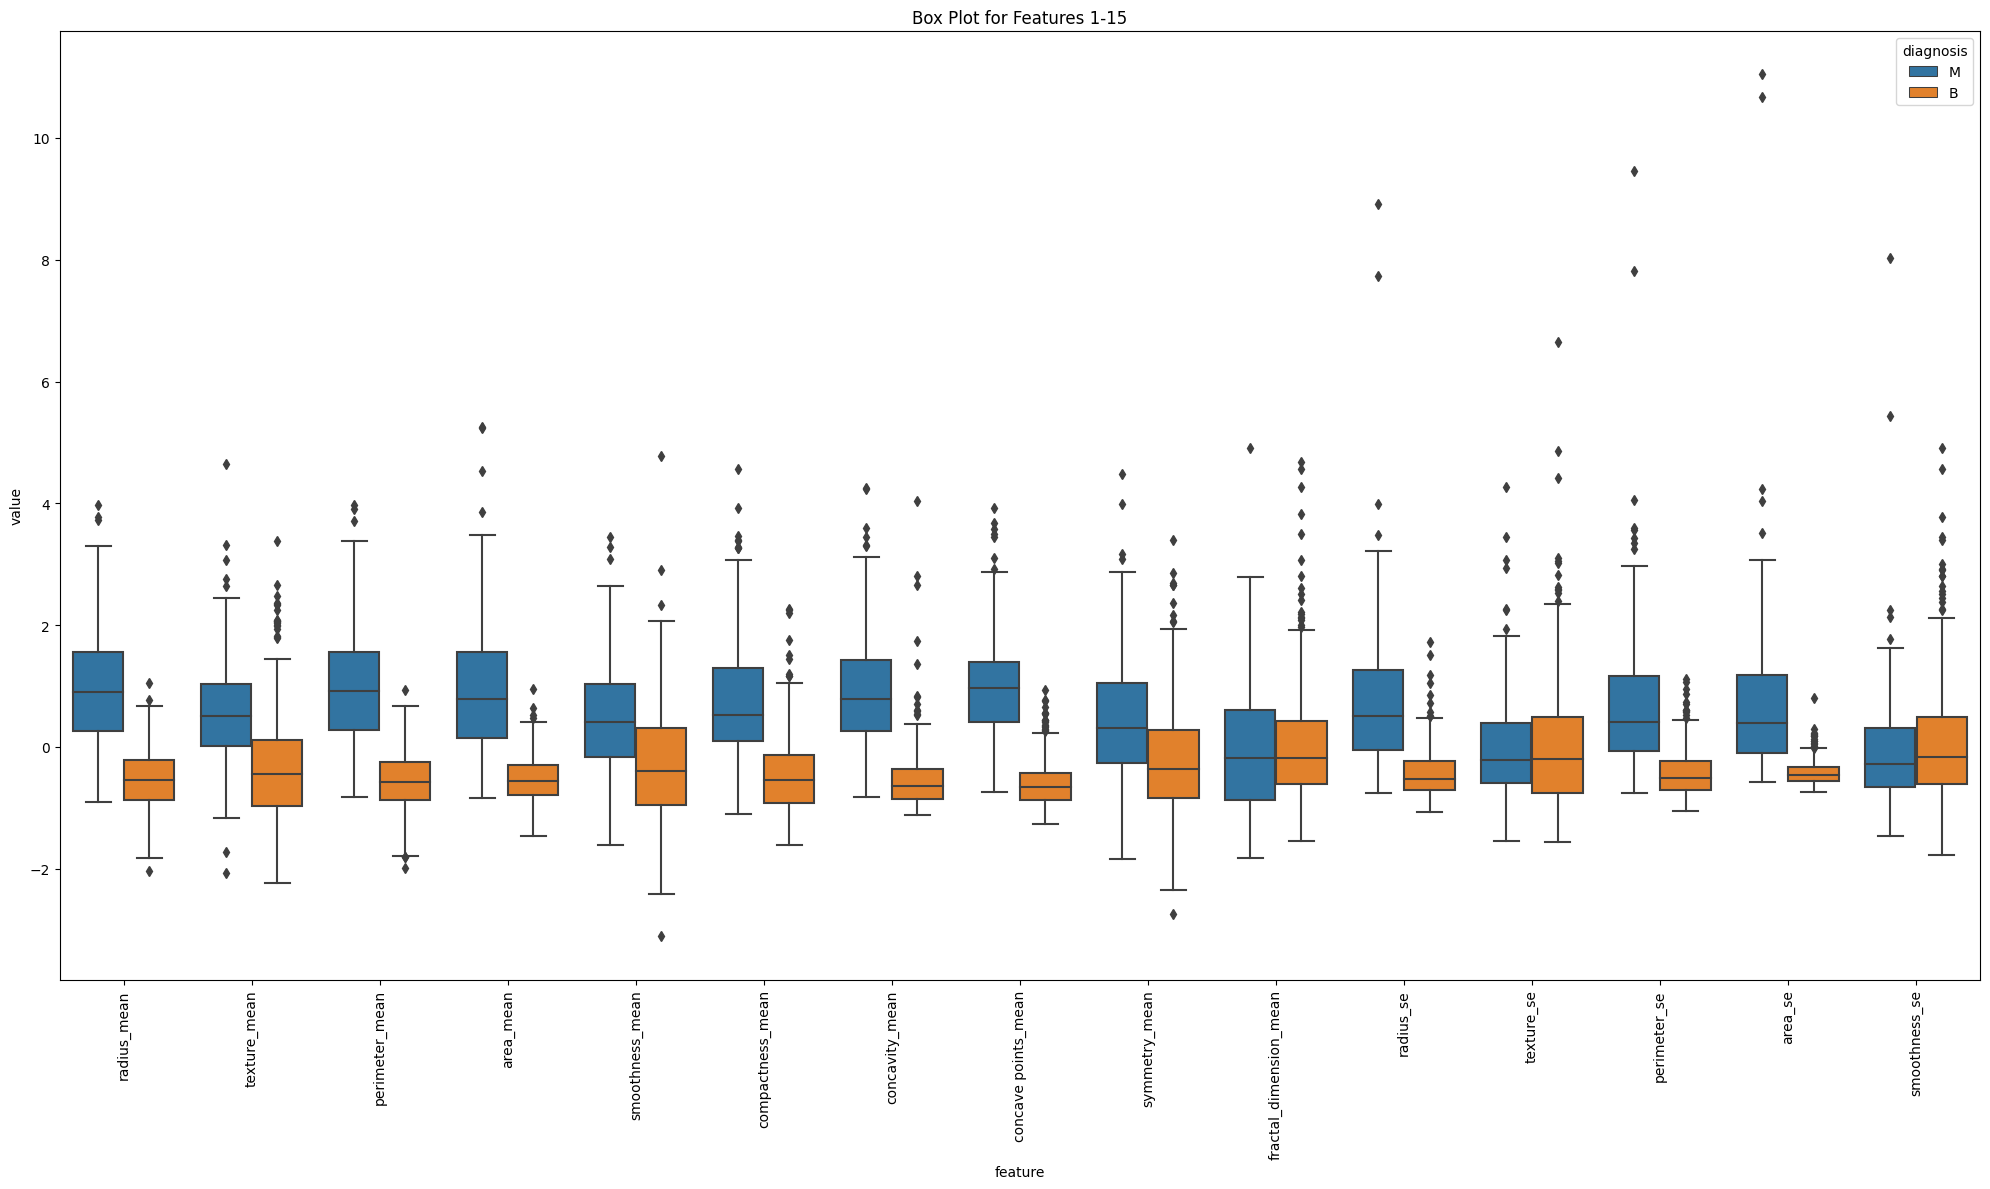

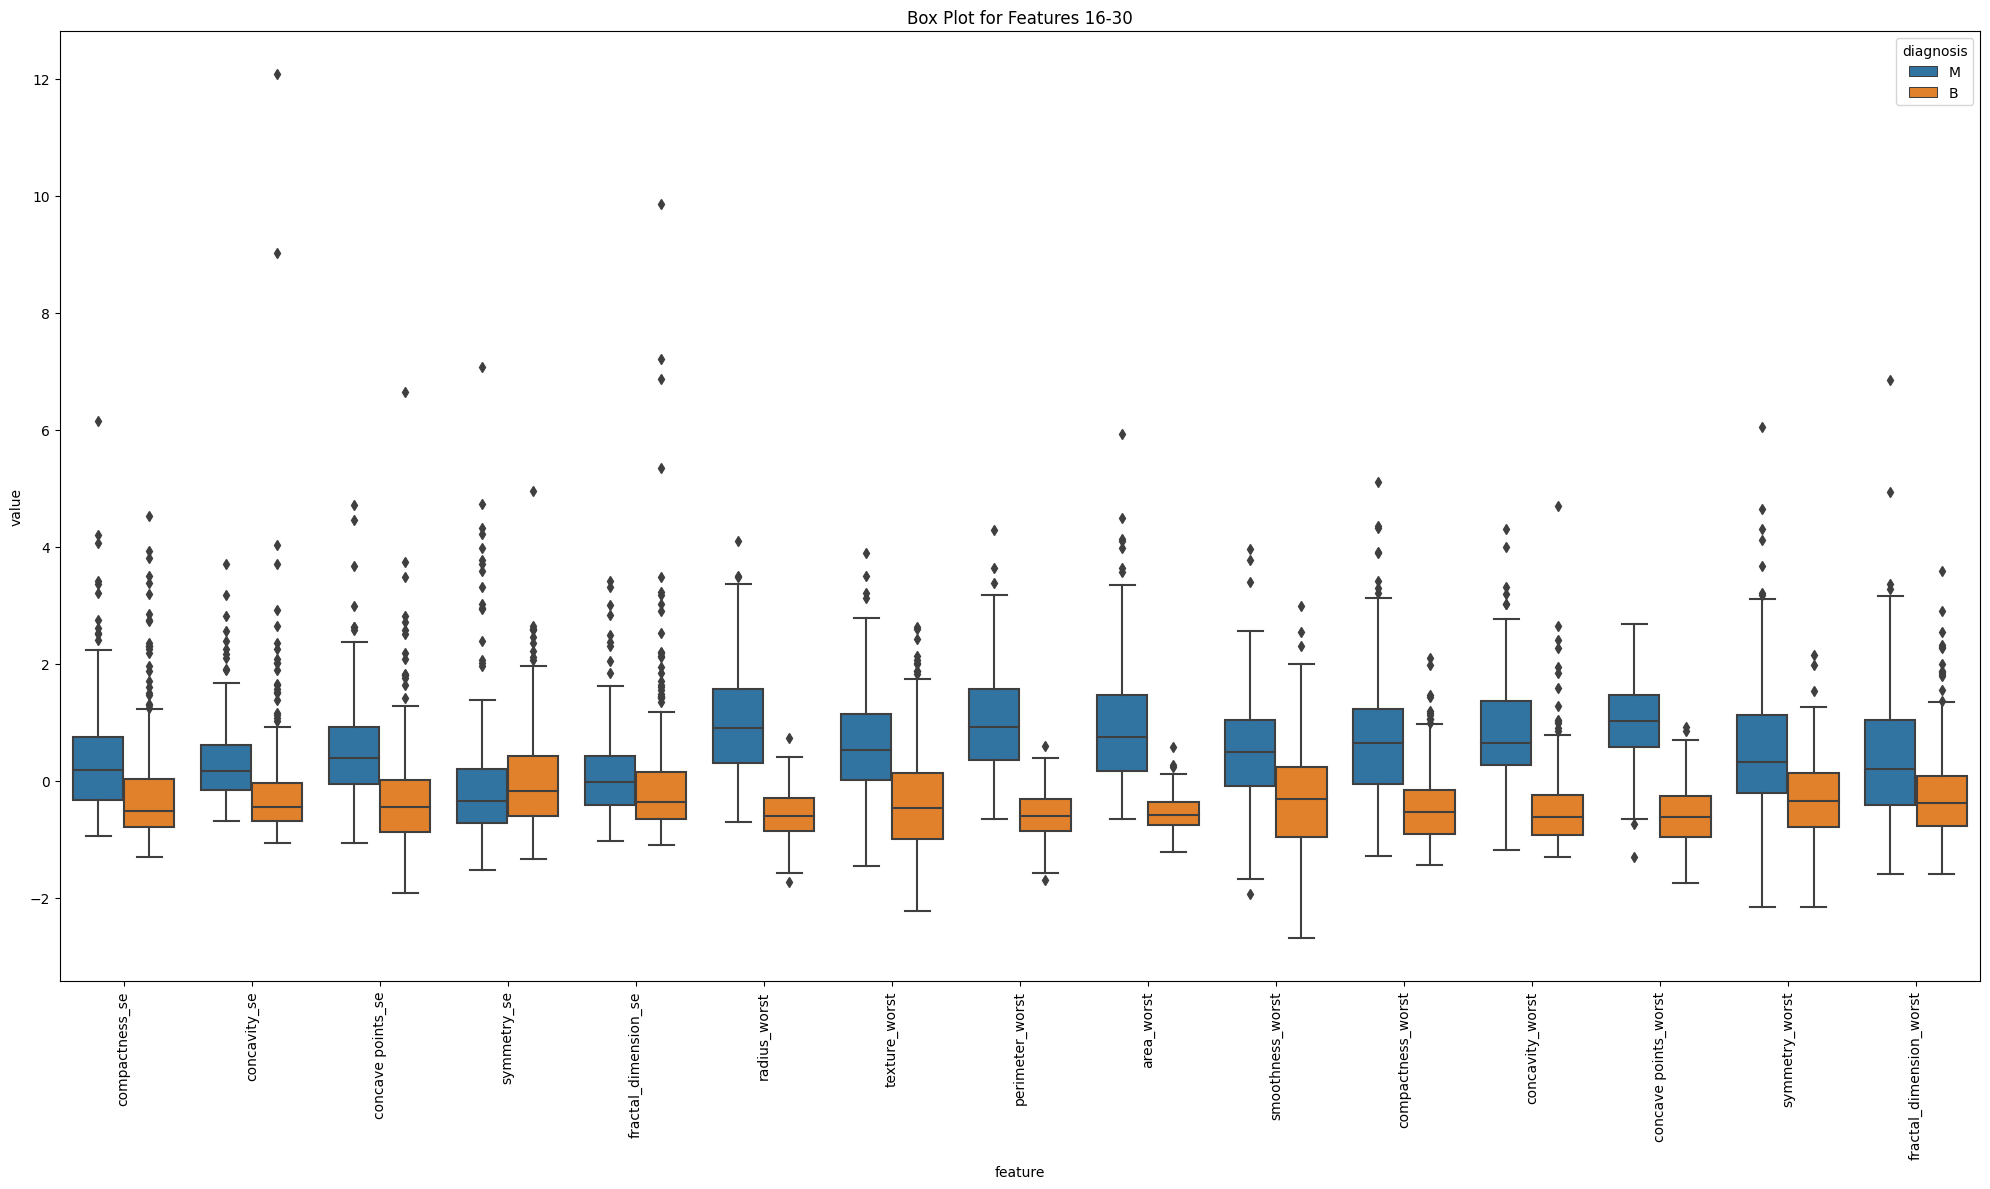

In [13]:

# Assume df_scaled is your standardized features DataFrame
# and df_cleaned contains the "diagnosis" column.
diagnosis = y

# ----- Group 1: First 15 Features -----
group1 = pd.concat([diagnosis, df_scaled.iloc[:, 0:15]], axis=1)
group1_long = pd.melt(group1, id_vars="diagnosis", var_name="feature", value_name="value")

plt.figure(figsize=(20,12))
sns.boxplot(x="feature", y="value", hue="diagnosis", data=group1_long)
plt.xticks(rotation=90)
plt.title("Box Plot for Features 1-15")
plt.tight_layout()
plt.show()

# ----- Group 2: Next 15 Features -----
group2 = pd.concat([diagnosis, df_scaled.iloc[:, 15:30]], axis=1)
group2_long = pd.melt(group2, id_vars="diagnosis", var_name="feature", value_name="value")

plt.figure(figsize=(20,12))
sns.boxplot(x="feature", y="value", hue="diagnosis", data=group2_long)
plt.xticks(rotation=90)
plt.title("Box Plot for Features 16-30")
plt.tight_layout()
plt.show()


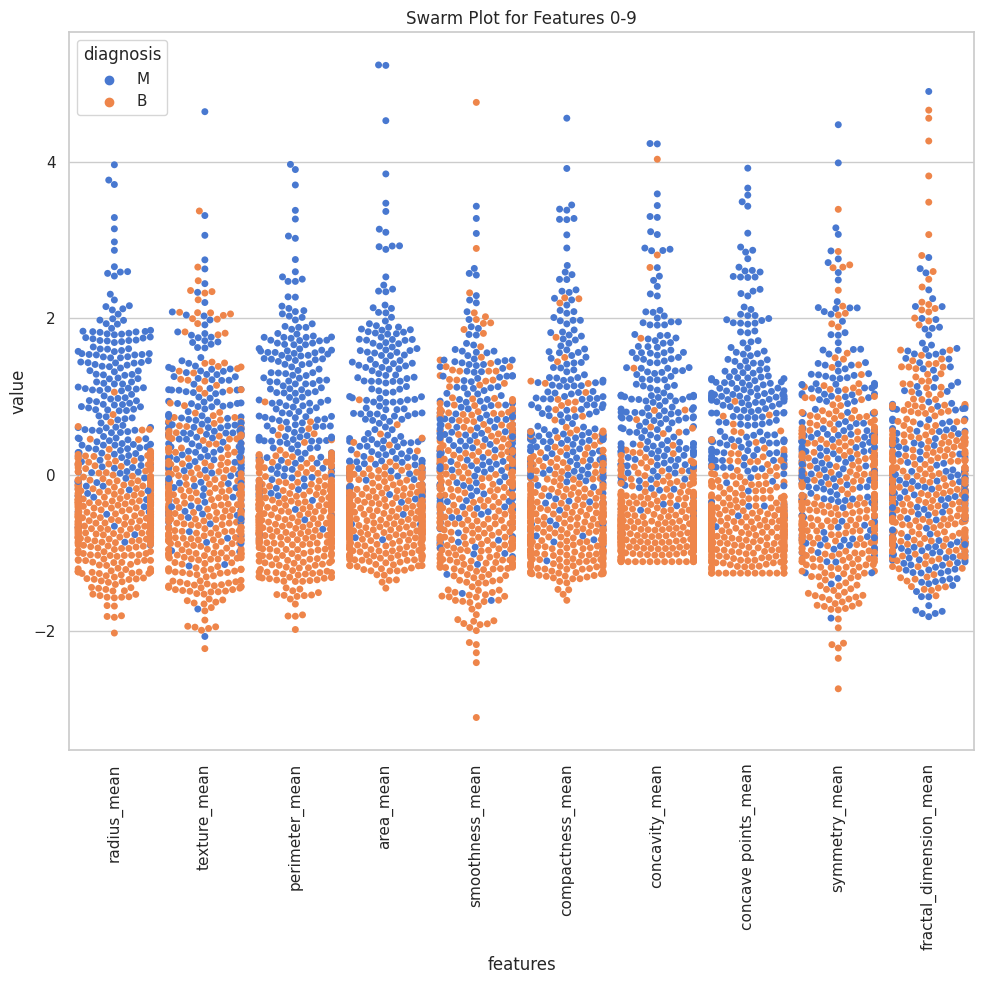

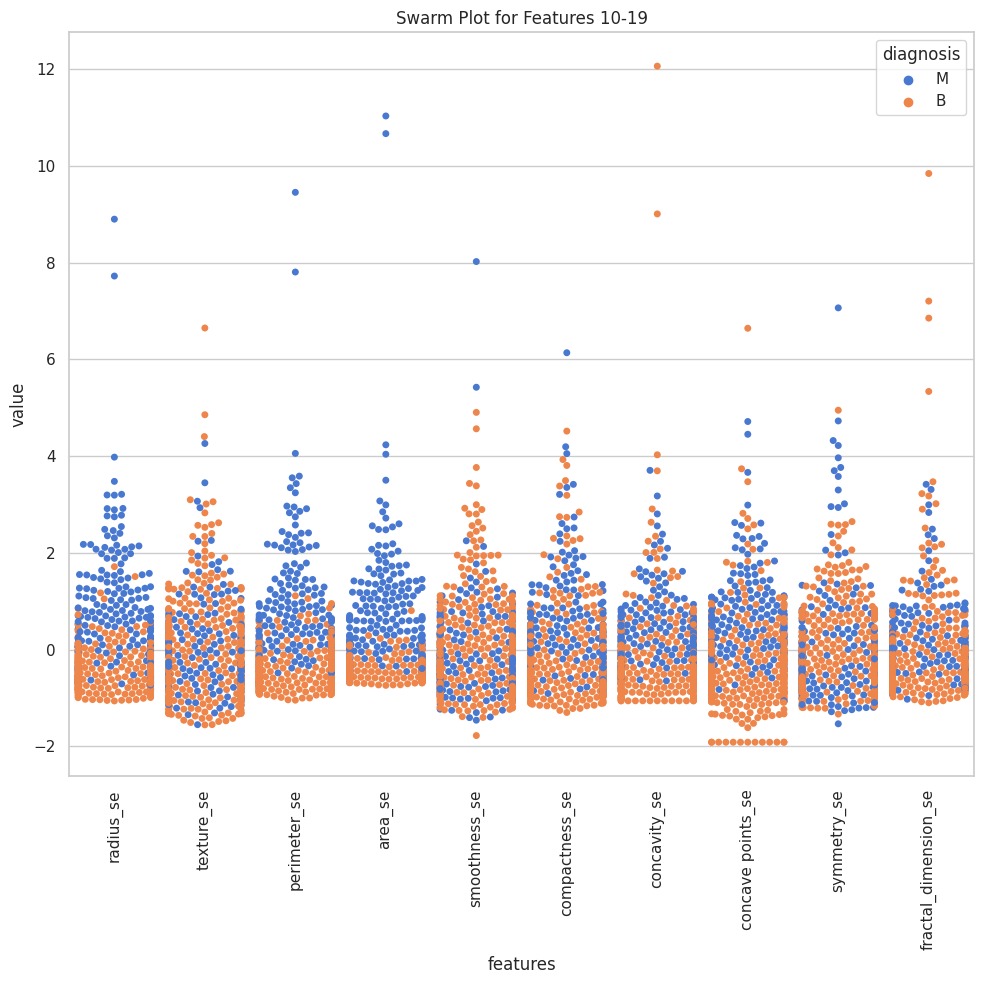

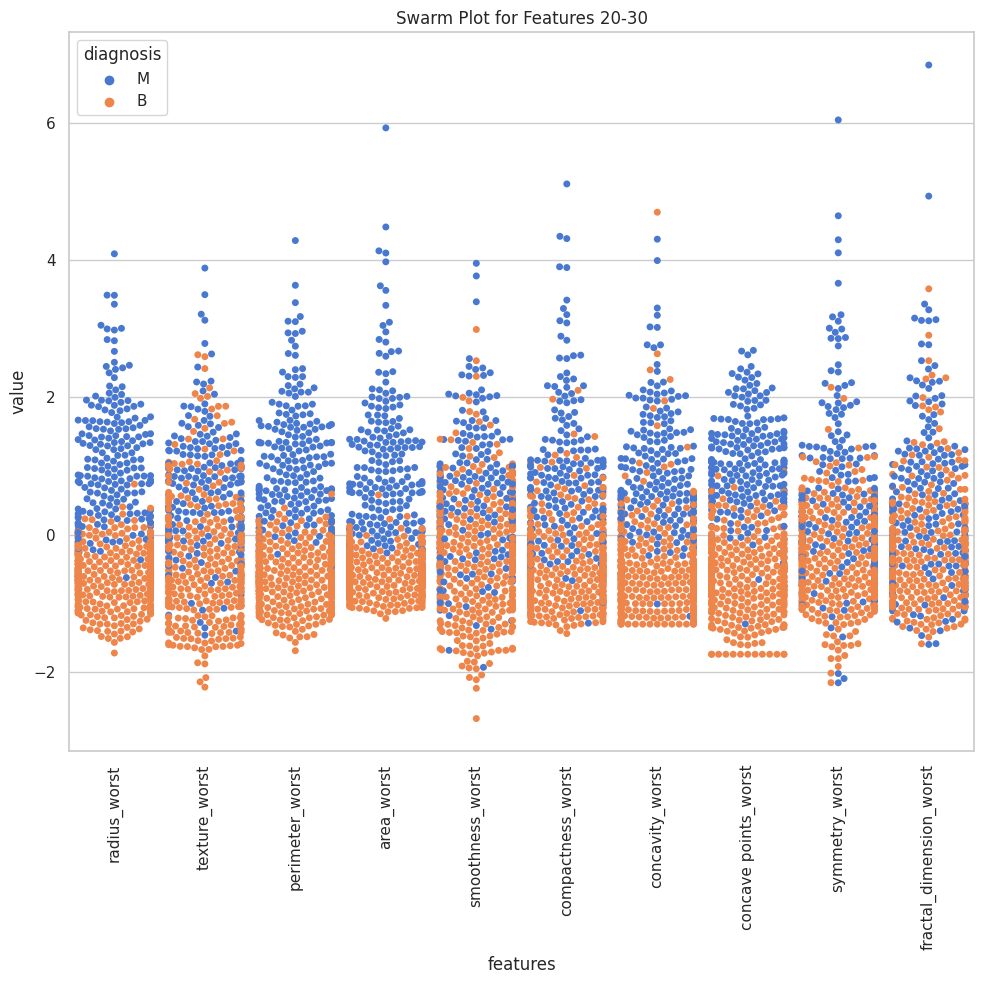

Swarm plot time:  54.8372917175293  s


In [14]:
import warnings
warnings.filterwarnings("ignore", message=".*points cannot be placed.*")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set(style="whitegrid", palette="muted")

# Assuming y contains your diagnosis column and x your features
data = x
data_n_2 = (data - data.mean()) / data.std()  # Standardization

# ----- Group 1: Features 0-9 -----
data_part1 = pd.concat([y, data_n_2.iloc[:, 0:10]], axis=1)
data_long1 = pd.melt(data_part1, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_long1)
plt.xticks(rotation=90)
plt.title("Swarm Plot for Features 0-9")
plt.tight_layout()
plt.show()

# ----- Group 2: Features 10-19 -----
data_part2 = pd.concat([y, data_n_2.iloc[:, 10:20]], axis=1)
data_long2 = pd.melt(data_part2, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_long2)
plt.xticks(rotation=90)
plt.title("Swarm Plot for Features 10-19")
plt.tight_layout()
plt.show()

# ----- Group 3: Features 20-30 -----
data_part3 = pd.concat([y, data_n_2.iloc[:, 20:31]], axis=1)
data_long3 = pd.melt(data_part3, id_vars="diagnosis", var_name="features", value_name="value")
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data_long3)
plt.xticks(rotation=90)
plt.title("Swarm Plot for Features 20-30")
plt.tight_layout()
plt.show()

toc = time.time()
print("Swarm plot time: ", toc-tic, " s")


## A Quick Observation on Our Feature Plots

They look cool, right? You can really see the variance and distribution of our features clearly now. Let me ask you a fun question: **Which feature do you think will be a better clue for our classification detective work?**

- **Area_worst:**  
  In the last swarm plot, it’s hard not to notice that the malignant (dangerous) and benign (less worrisome) cases are mostly separated. This suggests that `area_worst` might be a powerful clue for distinguishing between the two.

- **Fractal_dimension_mean:**  
  On the other hand, in swarm plot 1, malignant and benign cases seem to be all mixed up. This makes it a bit like a messy clue—hard to tell which group it belongs to, and might not help much in our classification efforts.

In short, features like `area_worst` that show clear separation between classes are more promising for our model. Meanwhile, features like `fractal_dimension_mean` might not be as useful because they mix up the clues. Which one do you think will help our detective work more? Let's dive deeper!


## Observing All Feature Correlations

What if we want to see how all our clues (features) interact with each other? The answer is a **heatmap**—an old but powerful visualization tool. Imagine a weather map that shows hot and cold spots; a heatmap does the same by displaying how strongly features are correlated with one another.

With a heatmap, you can quickly see:
- **Strong correlations:** Features that are almost best friends—providing similar information.
- **Weak correlations:** Features that are more independent and might offer unique insights.

This one colorful plot lets us decide which features might be redundant and which ones could be our secret weapons for classification. It's old school but, trust me, still super effective!


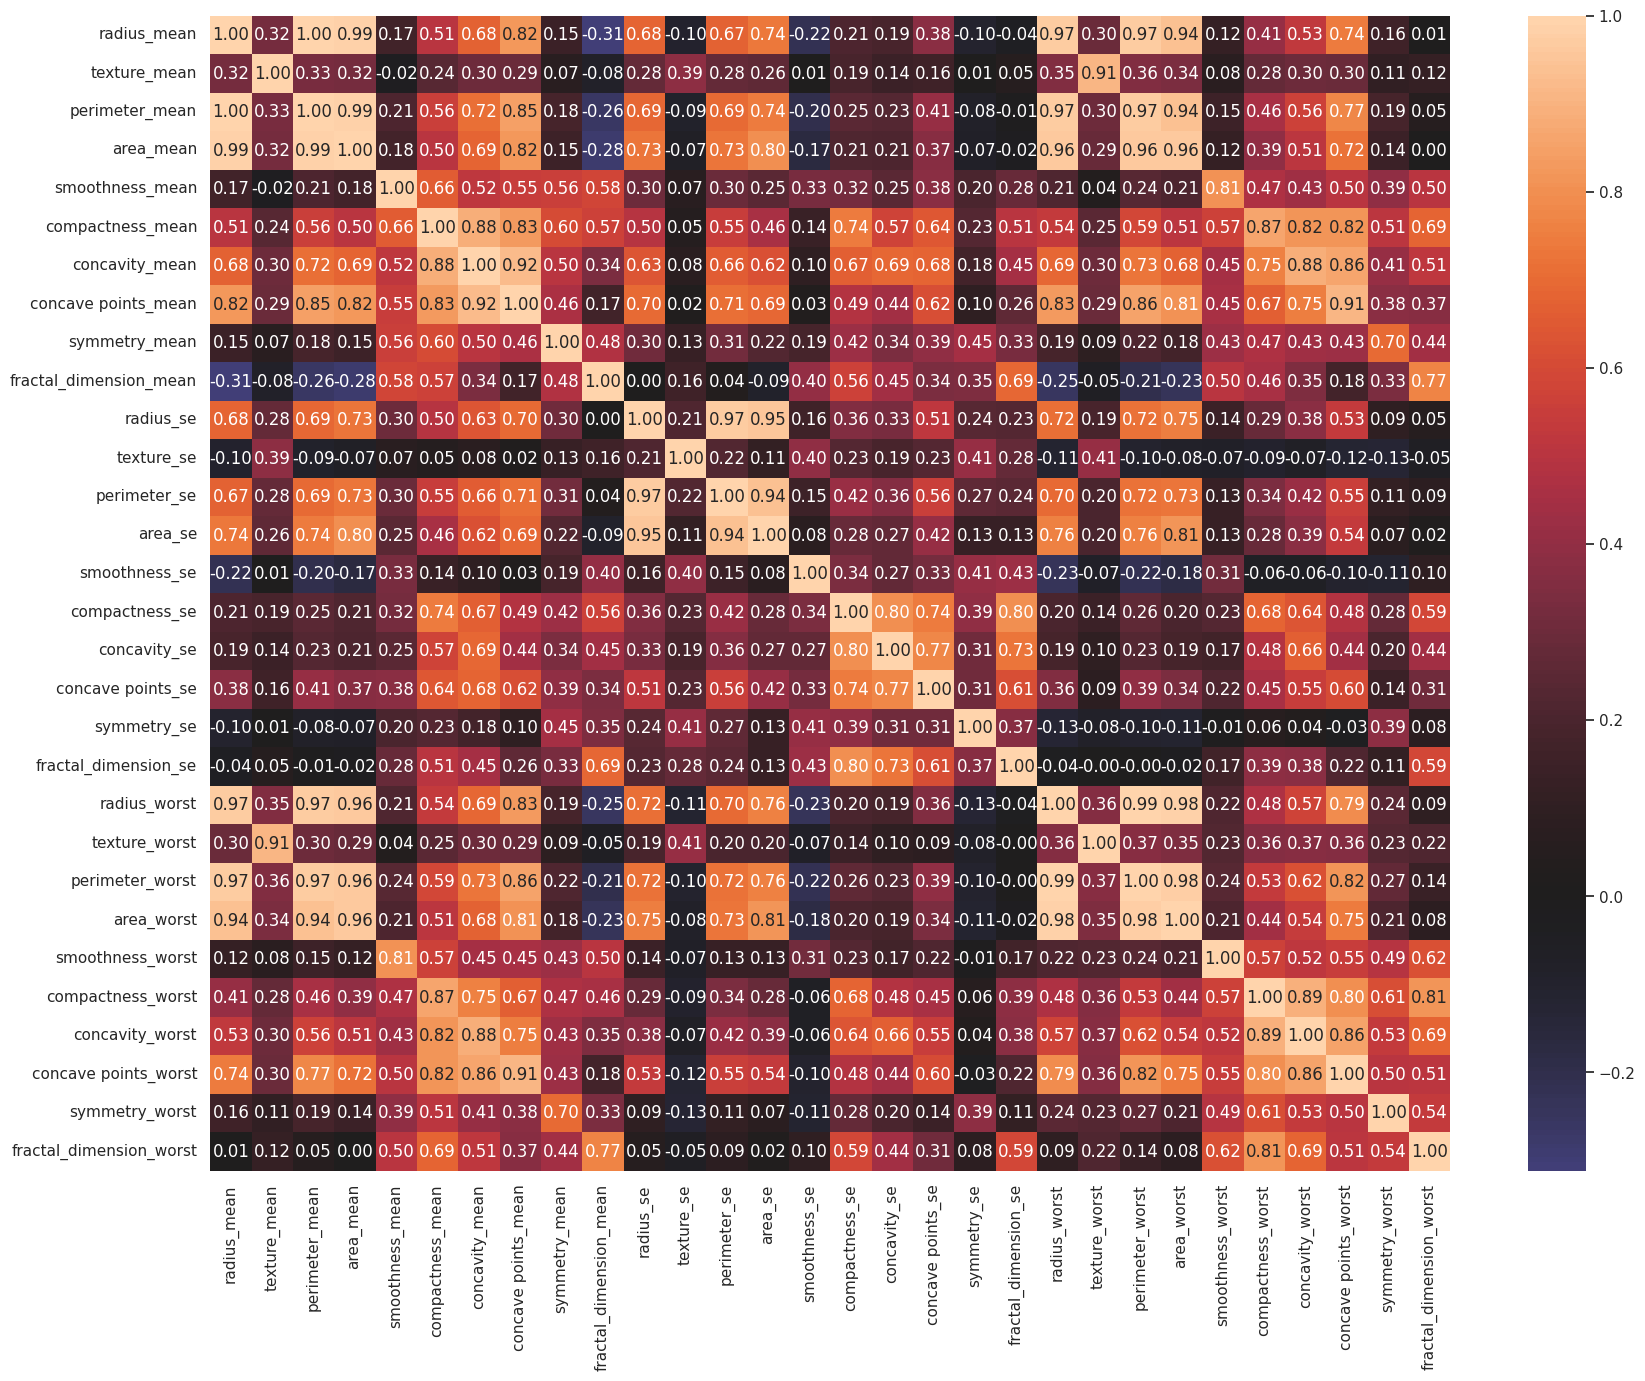

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(x[all_columns].corr(), center=0, annot=True, fmt=".2f")
plt.show()


## Choosing the Best Clues: Tackling Multicollinearity

Sometimes, our clues might be too chatty (highly correlated) and give us the same information over and over. To avoid confusion, we:
- Identify pairs of highly related clues.
- Use a simple logistic regression test (like a mini interview) to see which one is more predictive.
- Keep the star clue and discard the redundant one.


In [16]:
corr_matrix = x[all_columns[0:]].corr()
mask = corr_matrix >= 0.9
mask

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                     True         False            True       True   
texture_mean                   False          True           False      False   
perimeter_mean                  True         False            True       True   
area_mean                       True         False            True       True   
smoothness_mean                False         False           False      False   
compactness_mean               False         False           False      False   
concavity_mean                 False         False           False      False   
concave points_mean            False         False           False      False   
symmetry_mean                  False         False           False      False   
fractal_dimension_mean         False         False           False      False   
radius_se                      False         False           False      False   
texture_se                     False         False           False      False   
perimeter_se                   False         False           False      False   
area_se                        False         False           False      False   
smoothness_se                  False         False           False      False   
compactness_se                 False         False           False      False   
concavity_se                   False         False           False      False   
concave points_se              False         False           False      False   
symmetry_se                    False         False           False      False   
fractal_dimension_se           False         False           False      False   
radius_worst                    True         False            True       True   
texture_worst                  False          True           False      False   
perimeter_worst                 True         False            True       True   
area_worst                      True         False            True       True   
smoothness_worst               False         False           False      False   
compactness_worst              False         False           False      False   
concavity_worst                False         False           False      False   
concave points_worst           False         False           False      False   
symmetry_worst                 False         False           False      False   
fractal_dimension_worst        False         False           False      False   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                        False             False           False   
texture_mean                       False             False           False   
perimeter_mean                     False             False           False   
area_mean                          False             False           False   
smoothness_mean                     True             False           False   
compactness_mean                   False              True           False   
concavity_mean                     False             False            True   
concave points_mean                False             False            True   
symmetry_mean                      False             False           False   
fractal_dimension_mean             False             False           False   
radius_se                          False             False           False   
texture_se                         False             False           False   
perimeter_se                       False             False           False   
area_se                            False             False           False   
smoothness_se                      False             False           False   
compactness_se                     False             False           False   
concavity_se                       False             False           False   
concave points_se                  False             False           False   
symmetry_se                    

In [17]:
correlated_cols = []
for column1 in all_columns[1:]:
    for column2 in all_columns[1:]:
        if corr_matrix[column1][column2] >= 0.9 and column1!=column2:
            pair = (column1, column2)
            if pair not in correlated_cols and pair[::-1] not in correlated_cols:
                correlated_cols.append(pair)

In [18]:
correlated_cols

[('texture_mean', 'texture_worst'),
 ('perimeter_mean', 'area_mean'),
 ('perimeter_mean', 'radius_worst'),
 ('perimeter_mean', 'perimeter_worst'),
 ('perimeter_mean', 'area_worst'),
 ('area_mean', 'radius_worst'),
 ('area_mean', 'perimeter_worst'),
 ('area_mean', 'area_worst'),
 ('concavity_mean', 'concave points_mean'),
 ('concave points_mean', 'concave points_worst'),
 ('radius_se', 'perimeter_se'),
 ('radius_se', 'area_se'),
 ('perimeter_se', 'area_se'),
 ('radius_worst', 'perimeter_worst'),
 ('radius_worst', 'area_worst'),
 ('perimeter_worst', 'area_worst')]

In [19]:

# --- Step 1: Evaluate each correlated feature using logistic regression ---
# Create a unique list of correlated columns from the correlated_cols list of pairs
cols = list({col for pair in correlated_cols for col in pair})

# Dictionary to store accuracy for each feature
accuracy_by_feature = {}

for column in cols:
    X_feature = df_scaled[column]          # Use standardized data
    y_target   = df_cleaned["diagnosis"]     # Diagnosis from original cleaned data
    model = LogisticRegression()
    # Train on first 250 samples and test on the remaining samples
    model.fit(X_feature[:250].values.reshape(-1, 1), y_target[:250])
    accuracy = accuracy_score(y_target[250:], 
                              model.predict(X_feature[250:].values.reshape(-1, 1)))
    accuracy_by_feature[column] = accuracy

print("Accuracy by feature:")
print(accuracy_by_feature)


# --- Step 2: From each correlated pair, choose the feature with higher accuracy ---
important_columns = []
for pair in correlated_cols:
    score_a = accuracy_by_feature[pair[0]]
    score_b = accuracy_by_feature[pair[1]]
    # Choose the feature with the higher accuracy score
    chosen_feature = pair[0] if score_a >= score_b else pair[1]
    if chosen_feature not in important_columns:
        important_columns.append(chosen_feature)

print("Important (selected) columns:")
print(important_columns)


# --- Step 3: Drop from the standardized dataset (df_scaled) those features not in important_columns ---
# Create a copy of df_scaled
df_filtered = df_scaled.copy()
for col in cols:
    if col not in important_columns:
        df_filtered.drop(columns=col, inplace=True)




Accuracy by feature:
{'area_worst': 0.9090909090909091, 'radius_se': 0.8557993730407524, 'radius_worst': 0.9059561128526645, 'concave points_mean': 0.9184952978056427, 'texture_worst': 0.7053291536050157, 'perimeter_mean': 0.8934169278996865, 'perimeter_se': 0.8463949843260188, 'area_mean': 0.8808777429467085, 'concave points_worst': 0.9059561128526645, 'area_se': 0.9090909090909091, 'concavity_mean': 0.896551724137931, 'perimeter_worst': 0.9153605015673981, 'texture_mean': 0.7272727272727273}
Important (selected) columns:
['texture_mean', 'perimeter_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_mean', 'radius_se', 'area_se']


In [20]:
df_filtered.shape


(569, 25)

In [21]:
df_filtered.head()

radius_mean  texture_mean  perimeter_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934         1.568466   
1     1.829821     -0.353632        1.685955        -0.826962   
2     1.579888      0.456187        1.566503         0.942210   
3    -0.768909      0.253732       -0.592687         3.283553   
4     1.750297     -1.151816        1.776573         0.280372   

   compactness_mean  concave points_mean  symmetry_mean  \
0          3.283515             2.532475       2.217515   
1         -0.487072             0.548144       0.001392   
2          1.052926             2.037231       0.939685   
3          3.402909             1.451707       2.867383   
4          0.539340             1.428493      -0.009560   

   fractal_dimension_mean  radius_se  texture_se  ...  symmetry_se  \
0                2.255747   2.489734   -0.565265  ...     1.148757   
1               -0.868652   0.499255   -0.876244  ...    -0.805450   
2               -0.398008   1.228676   -0.780083  ...     0.237036   
3                4.910919   0.326373   -0.110409  ...     4.732680   
4               -0.562450   1.270543   -0.790244  ...    -0.361092   

   fractal_dimension_se  radius_worst  perimeter_worst  area_worst  \
0              0.907083      1.886690         2.303601    2.001237   
1             -0.099444      1.805927         1.535126    1.890489   
2              0.293559      1.511870         1.347475    1.456285   
3              2.047511     -0.281464        -0.249939   -0.550021   
4              0.499328      1.298575         1.338539    1.220724   

   smoothness_worst  compactness_worst  concavity_worst  symmetry_worst  \
0          1.307686           2.616665         2.109526        2.750622   
1         -0.375612          -0.430444        -0.146749       -0.243890   
2          0.527407           1.082932         0.854974        1.152255   
3          3.394275           3.893397         1.989588        6.046041   
4          0.220556          -0.313395         0.613179       -0.868353   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  
2                 0.201391  
3                 4.935010  
4                -0.397100  

[5 rows x 25 columns]

In [22]:
X = df_filtered
y = y

## Training Our Models: The Detective’s Toolkit

Now comes the exciting part—training our models! We test several "tools" (machine learning algorithms) like XGBoost, RandomForest, and GradientBoosting. Think of this as trying out different detective gadgets to see which one solves the case best.

For each model, we:
- Split the data into training (practice detective work) and testing sets (real investigation).
- Tune the model using GridSearchCV (like calibrating a gadget for optimal performance).
- Evaluate performance using Accuracy, Precision, Recall, and F1 Score.
- Display confusion matrices to visually see how many cases we solved correctly versus the ones we missed.


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (455, 25), (455,)
Train Data: (114, 25), (114,)


Evaluating XGBoost...
Best parameters for XGBoost: {'clf__max_depth': 4, 'clf__n_estimators': 150}

XGBoost Performance on Test Data:
Accuracy: 95.61%
Precision Score: 0.9523809523809523
Recall Score: 0.9302325581395349
F1 Score: 0.9411764705882352


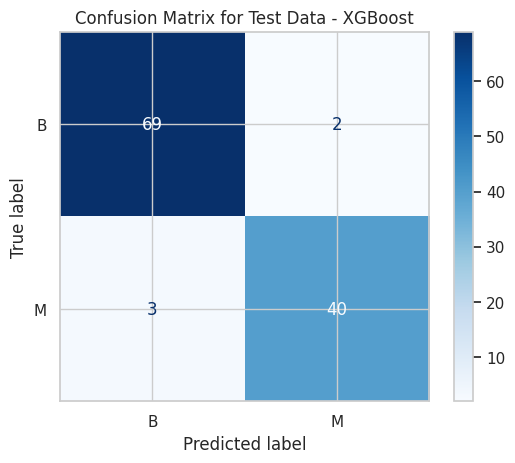


XGBoost Performance on Whole Data:
Accuracy: 99.12%
Precision Score: 0.990521327014218
Recall Score: 0.9858490566037735
F1 Score: 0.9881796690307328


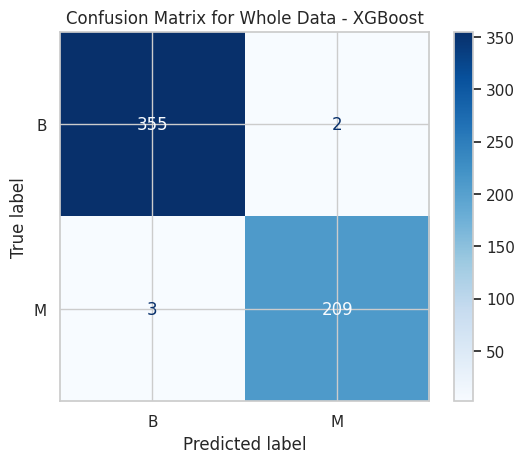

Evaluating RandomForest...
Best parameters for RandomForest: {'clf__max_depth': None, 'clf__n_estimators': 150}

RandomForest Performance on Test Data:
Accuracy: 96.49%
Precision Score: 0.975609756097561
Recall Score: 0.9302325581395349
F1 Score: 0.9523809523809524


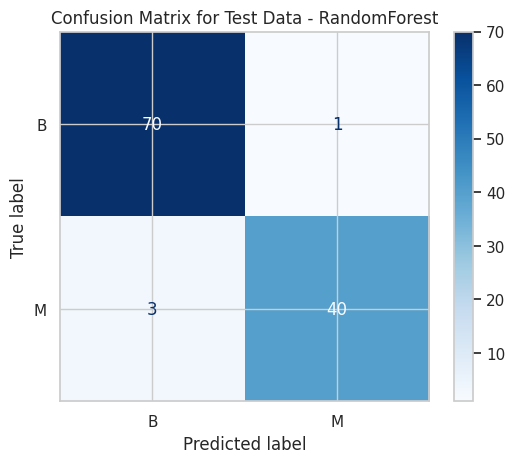


RandomForest Performance on Whole Data:
Accuracy: 99.30%
Precision Score: 0.9952380952380953
Recall Score: 0.9858490566037735
F1 Score: 0.9905213270142179


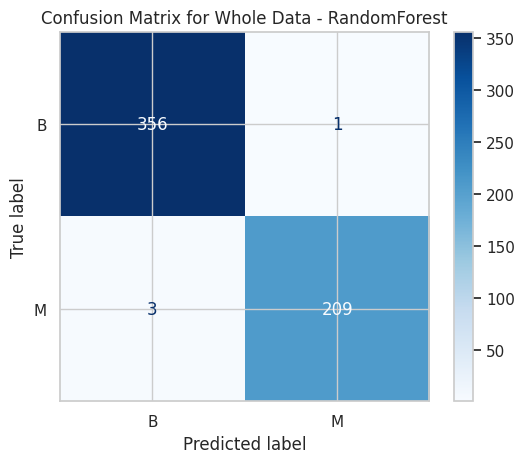

Evaluating GradientBoosting...
Best parameters for GradientBoosting: {'clf__max_depth': 3, 'clf__n_estimators': 150}

GradientBoosting Performance on Test Data:
Accuracy: 95.61%
Precision Score: 0.9523809523809523
Recall Score: 0.9302325581395349
F1 Score: 0.9411764705882352


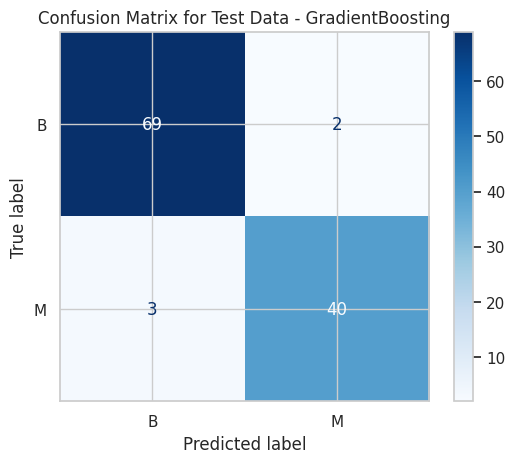


GradientBoosting Performance on Whole Data:
Accuracy: 99.12%
Precision Score: 0.990521327014218
Recall Score: 0.9858490566037735
F1 Score: 0.9881796690307328


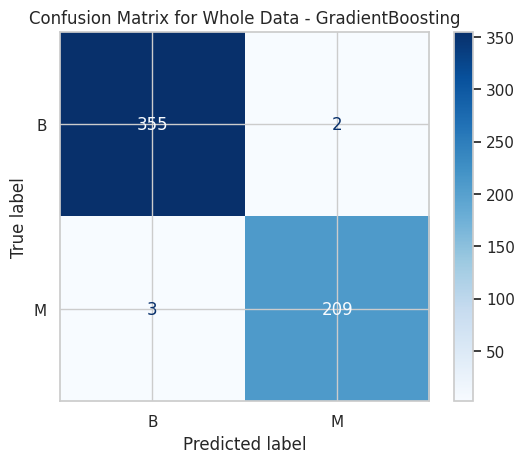

Evaluation complete. Model results:
XGBoost {'Test': {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1': 0.9411764705882352}, 'Whole': {'Accuracy': 0.9912126537785588, 'Precision': 0.990521327014218, 'Recall': 0.9858490566037735, 'F1': 0.9881796690307328}}
RandomForest {'Test': {'Accuracy': 0.9649122807017544, 'Precision': 0.975609756097561, 'Recall': 0.9302325581395349, 'F1': 0.9523809523809524}, 'Whole': {'Accuracy': 0.9929701230228472, 'Precision': 0.9952380952380953, 'Recall': 0.9858490566037735, 'F1': 0.9905213270142179}}
GradientBoosting {'Test': {'Accuracy': 0.956140350877193, 'Precision': 0.9523809523809523, 'Recall': 0.9302325581395349, 'F1': 0.9411764705882352}, 'Whole': {'Accuracy': 0.9912126537785588, 'Precision': 0.990521327014218, 'Recall': 0.9858490566037735, 'F1': 0.9881796690307328}}


In [24]:

# Map diagnosis labels: "B" -> 0, "M" -> 1
label_map = {"B": 0, "M": 1}
y_numeric = df_cleaned["diagnosis"].map(label_map)

# Split the data (using your pre-scaled features and mapped target)
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled, y_numeric, test_size=0.2, random_state=42
)

# Define candidate models and their parameter grids
candidates = {
    "XGBoost": {
         "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
         "params": {
              "n_estimators": [50, 100, 150],
              "max_depth": [3, 4, 5]
         }
    },
    "RandomForest": {
         "model": RandomForestClassifier(random_state=42),
         "params": {
              "n_estimators": [50, 100, 150],
              "max_depth": [None, 5, 10]
         }
    },
    "GradientBoosting": {
         "model": GradientBoostingClassifier(random_state=42),
         "params": {
              "n_estimators": [50, 100, 150],
              "max_depth": [3, 4, 5]
         }
    }
}

results = {}  # To store performance for each model

for model_name, candidate in candidates.items():
    print("==========================================")
    print(f"Evaluating {model_name}...")
    
    # Create a pipeline (here it only contains the classifier)
    pipeline = Pipeline([('clf', candidate["model"])])
    
    # Create a parameter grid for GridSearchCV (prepend 'clf__' to each param)
    param_grid = {f"clf__{k}": v for k, v in candidate["params"].items()}
    
    # Run GridSearchCV with 5-fold cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    
    # --- Evaluation on Test Data ---
    preds_test = best_model.predict(X_test)
    acc_test = accuracy_score(y_test, preds_test)
    prec_test = precision_score(y_test, preds_test, pos_label=1)
    rec_test = recall_score(y_test, preds_test, pos_label=1)
    f1_test = f1_score(y_test, preds_test, pos_label=1)
    
    print(f"\n{model_name} Performance on Test Data:")
    print(f"Accuracy: {acc_test*100:.2f}%")
    print(f"Precision Score: {prec_test}")
    print(f"Recall Score: {rec_test}")
    print(f"F1 Score: {f1_test}")
    
    # Plot confusion matrix for Test Data
    disp_test = ConfusionMatrixDisplay.from_estimator(
        best_model, X_test, y_test, display_labels=["B", "M"], cmap=plt.cm.Blues
    )
    plt.title(f"Confusion Matrix for Test Data - {model_name}")
    plt.show()
    
    # --- Evaluation on Whole Data ---
    preds_all = best_model.predict(df_scaled)
    acc_all = accuracy_score(y_numeric, preds_all)
    prec_all = precision_score(y_numeric, preds_all, pos_label=1)
    rec_all = recall_score(y_numeric, preds_all, pos_label=1)
    f1_all = f1_score(y_numeric, preds_all, pos_label=1)
    
    print(f"\n{model_name} Performance on Whole Data:")
    print(f"Accuracy: {acc_all*100:.2f}%")
    print(f"Precision Score: {prec_all}")
    print(f"Recall Score: {rec_all}")
    print(f"F1 Score: {f1_all}")
    
    # Plot confusion matrix for Whole Data
    disp_all = ConfusionMatrixDisplay.from_estimator(
        best_model, df_scaled, y_numeric, display_labels=["B", "M"], cmap=plt.cm.Blues
    )
    plt.title(f"Confusion Matrix for Whole Data - {model_name}")
    plt.show()
    
    # Save results
    results[model_name] = {
       "Test": {"Accuracy": acc_test, "Precision": prec_test, "Recall": rec_test, "F1": f1_test},
       "Whole": {"Accuracy": acc_all, "Precision": prec_all, "Recall": rec_all, "F1": f1_all}
    }

print("==========================================")
print("Evaluation complete. Model results:")
for model, metrics in results.items():
    print(model, metrics)


In [25]:
# Select the best model based on the highest F1 score on Test Data
best_model_name = None
best_f1_test = -1

for model_name, metrics in results.items():
    test_f1 = metrics["Test"]["F1"]
    if test_f1 > best_f1_test:
        best_f1_test = test_f1
        best_model_name = model_name

print("==========================================")
print(f"Best Model: {best_model_name}")
print("\nTest Data Metrics:")
print(f"  Accuracy: {results[best_model_name]['Test']['Accuracy']*100:.2f}%")
print(f"  Precision: {results[best_model_name]['Test']['Precision']}")
print(f"  Recall: {results[best_model_name]['Test']['Recall']}")
print(f"  F1 Score: {results[best_model_name]['Test']['F1']}")

print("\nWhole Data Metrics:")
print(f"  Accuracy: {results[best_model_name]['Whole']['Accuracy']*100:.2f}%")
print(f"  Precision: {results[best_model_name]['Whole']['Precision']}")
print(f"  Recall: {results[best_model_name]['Whole']['Recall']}")
print(f"  F1 Score: {results[best_model_name]['Whole']['F1']}")
print("==========================================")


Best Model: RandomForest

Test Data Metrics:
  Accuracy: 96.49%
  Precision: 0.975609756097561
  Recall: 0.9302325581395349
  F1 Score: 0.9523809523809524

Whole Data Metrics:
  Accuracy: 99.30%
  Precision: 0.9952380952380953
  Recall: 0.9858490566037735
  F1 Score: 0.9905213270142179


## Selecting the Best Model: The Ultimate Detective Gadget

After comparing all our gadgets (models) using cross-validation and tuning, we automatically select the best one based on the highest F1 Score on the test data. 

**Our Findings:**
- **Best Model:** RandomForest
- **Test Data:** Accuracy ~96.49%, Precision ~0.98, Recall ~0.93, F1 Score ~0.95
- **Whole Data:** Accuracy ~99.30%, Precision ~0.99, Recall ~0.99, F1 Score ~0.99

These metrics mean our chosen model is very effective at distinguishing between benign and malignant cases, much like a super detective who almost never misses a clue!


## Conclusion: Case Closed!

In this notebook, we embarked on a data-driven adventure to predict breast cancer outcomes. We:
- Loaded and explored a complex dataset.
- Cleaned, standardized, and prepared the data.
- Tackled issues like multicollinearity by selecting the most predictive features.
- Experimented with several machine learning models.
- Automatically selected the best model based on robust performance metrics.

Our final model (RandomForest) showed exceptional performance, promising a reliable tool for early cancer detection. With further fine-tuning and validation, this approach could contribute to better diagnostic systems and ultimately save lives.

*Case closed!*
